In [ ]:
from google.colab import files
upload=files.upload()

Saving Medicalpremium.csv to Medicalpremium.csv


In [ ]:
# basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# visulations libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Data pre-processing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [ ]:
df=pd.read_csv('Medicalpremium.csv')

In [ ]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
X=df.drop('PremiumPrice',axis=1)
y=df['PremiumPrice']

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2,k=10)
fit= bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,Age,3684.410789
1,Diabetes,38.131379
2,BloodPressureProblems,47.971786
3,AnyTransplants,605.471967
4,AnyChronicDiseases,300.219653
5,Height,9.630908
6,Weight,631.927366
7,KnownAllergies,39.431808
8,HistoryOfCancerInFamily,268.761684
9,NumberOfMajorSurgeries,513.597250


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.39678359 0.02294439 0.02339988 0.03840974 0.04668016 0.10476078
 0.16121269 0.023148   0.03299836 0.14966241]


Model Creation

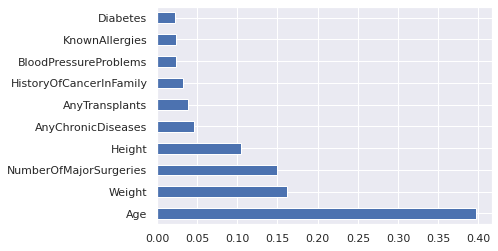

In [ ]:
feat_imp =pd.Series(model.feature_importances_,index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3,random_state=43)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Decision Tree

In [ ]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,Y_train)
y_pred_tree= d_tree.predict(X_test)
y_prob_tree =d_tree.predict_proba(X_test)
acc=accuracy_score(Y_test,y_pred_tree)
acc

0.9054054054054054

Random forest


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred_rf= rf.predict(X_test)
y_prob_rf =rf.predict_proba(X_test)
acc=accuracy_score(Y_test,y_pred_rf)
acc

0.918918918918919

In [ ]:
from sklearn.metrics import confusion_matrix

Text(66.5, 0.5, 'truth')

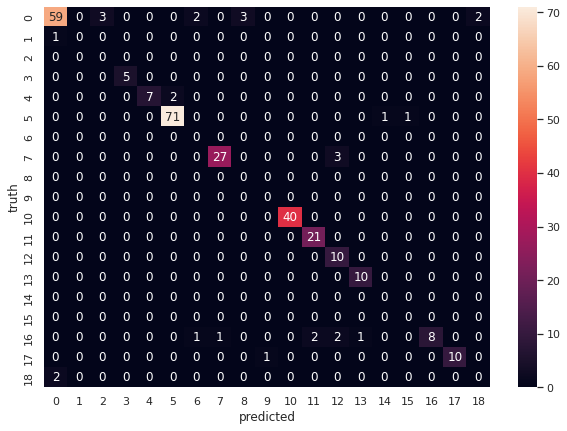

In [ ]:
cm_tree = confusion_matrix(Y_test,y_pred_tree)
plt.figure(figsize=(10,7))
sns.heatmap(cm_tree,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")

Text(66.5, 0.5, 'truth')

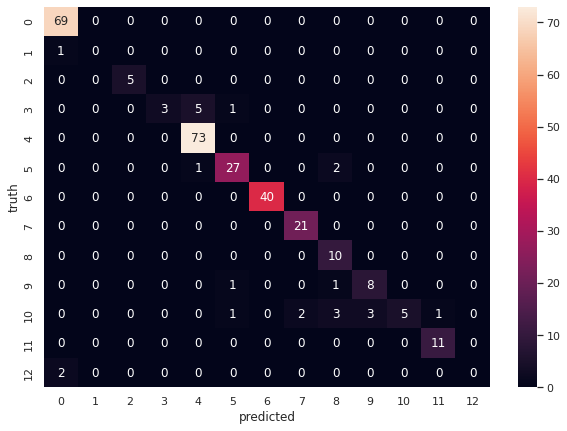

In [ ]:
cm_rf = confusion_matrix(Y_test,y_pred_rf)
plt.figure(figsize=(10,7))
sns.heatmap(cm_rf,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")